# This notebook shows how to use GroupBy

In [1]:
import pandas as pd

df = pd.read_csv("../datasets/Minimum Wage Data.csv", encoding="utf-8")
# make sure to encode just in case, if utf-8 does not work then try latin encoding
 # then we can remake a new csv file and store it

df.to_csv("../datasets/minwage.csv", encoding="utf-8")


In [2]:
df = pd.read_csv("../datasets/minwage.csv")

df.head()

,Unnamed: 0,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,0,1968,Alabama,0.00000,0.00,1.15,8.55,1.15,8.55,34.8,...,0.00000,0.00,0.00000,0.00,NaN
1,1,1968,Alaska,2.10000,15.61,1.15,8.55,2.10,15.61,34.8,2.1,2.10000,15.61,2.10000,15.61,NaN
2,2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.8,18.72 - 26.40/wk(b),0.46800,3.48,0.66000,4.91,(b)
3,3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.8,1.25/day(b),0.15625,1.16,0.15625,1.16,(b)
4,4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.8,1.65(b),1.65000,12.26,1.65000,12.26,(b)


In [3]:
# analyze low values

gb = df.groupby("State")
gb.get_group("Ohio").set_index("Year").head()


,Unnamed: 0,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
Year,,,,,,,,,,,,,,,
1968,36,Ohio,0.75,5.57,1.15,8.55,1.15,8.55,34.8,.75 - 1.25(b),0.75,5.57,1.25,9.29,(b)
1969,90,Ohio,0.75,5.29,1.15,8.11,1.15,8.11,36.7,.75 - 1.25(b),0.75,5.29,1.25,8.81,(b)
1970,144,Ohio,0.75,5.00,1.30,8.67,1.30,8.67,38.8,.75 - 1.25(b),0.75,5.00,1.25,8.33,(b)
1971,198,Ohio,0.75,4.79,1.30,8.30,1.30,8.30,40.5,.75 - 1.25(b),0.75,4.79,1.25,7.98,(b)
1972,252,Ohio,0.75,4.64,1.60,9.90,1.60,9.90,41.8,.75 - 1.25(b),0.75,4.64,1.25,7.74,(b)


In [4]:
# create a new df for actual min wage
actual_min_wage = pd.DataFrame()

# for every name of state and group
for name, group in df.groupby("State"):
    # if the df is empty assign the group (column) to the min wage for the state with its' name
    if actual_min_wage.empty:
        actual_min_wage = group.set_index("Year")[ ["State.Minimum.Wage.2020.Dollars"]].rename(
            columns={"State.Minimum.Wage.2020.Dollars": name})
    # else if the df exists then join it anyhow with any existing groups (cols) for each state
    else:
        actual_min_wage = actual_min_wage.join(group.set_index("Year")[ ["State.Minimum.Wage.2020.Dollars"]].rename(
            columns={"State.Minimum.Wage.2020.Dollars": str(name) + " Min Wage"}))

# drop any N/A vals
actual_min_wage.dropna(inplace=True)
actual_min_wage.head()

# as we can see it returns min wage for each year for every state

,Alabama,Alaska Min Wage,Arizona Min Wage,Arkansas Min Wage,California Min Wage,Colorado Min Wage,Connecticut Min Wage,Delaware Min Wage,District of Columbia Min Wage,Florida Min Wage,...,Tennessee Min Wage,Texas Min Wage,U.S. Virgin Islands Min Wage,Utah Min Wage,Vermont Min Wage,Virginia Min Wage,Washington Min Wage,West Virginia Min Wage,Wisconsin Min Wage,Wyoming Min Wage
Year,,,,,,,,,,,,,,,,,,,,,
1968,0.0,15.61,3.48,1.16,12.26,7.43,10.41,9.29,9.29,0.0,...,0.0,0.00,0.0,7.43,10.41,0.0,11.89,7.43,9.29,8.92
1969,0.0,14.80,3.30,1.10,11.63,7.05,9.87,8.81,8.81,0.0,...,0.0,0.00,0.0,7.05,9.87,0.0,11.28,7.05,8.81,8.46
1970,0.0,14.00,3.12,7.33,11.00,6.67,10.67,8.33,10.67,0.0,...,0.0,0.00,0.0,6.67,10.67,0.0,10.67,6.67,8.67,8.67
1971,0.0,13.41,2.99,7.03,10.54,6.39,10.22,7.98,10.22,0.0,...,0.0,0.00,0.0,6.39,10.22,0.0,10.22,6.39,8.30,8.30
1972,0.0,12.99,2.90,7.43,10.21,6.19,11.45,9.90,9.90,0.0,...,0.0,8.66,0.0,7.43,9.90,0.0,9.90,7.43,8.97,9.28


<AxesSubplot:xlabel='Year'>

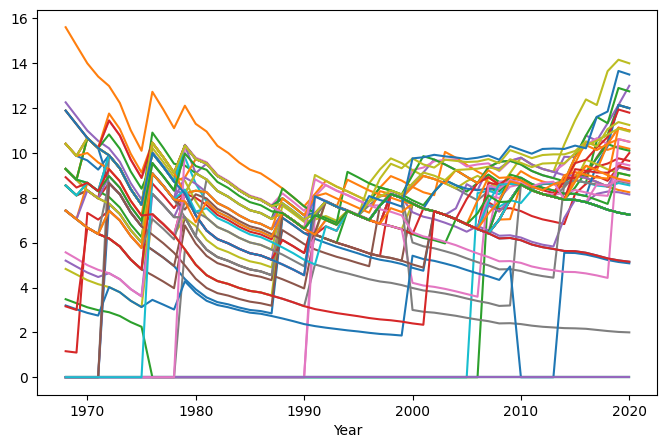

In [5]:
# lets plot this data
actual_min_wage.plot(figsize=(8, 5), legend=False)

# as shown below we get a horrendous graph that doesnt represent data clearly

In [6]:
# lets get some info about each group in the dataframe
actual_min_wage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 1968 to 2020
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Alabama                        53 non-null     float64
 1   Alaska Min Wage                53 non-null     float64
 2   Arizona Min Wage               53 non-null     float64
 3   Arkansas Min Wage              53 non-null     float64
 4   California Min Wage            53 non-null     float64
 5   Colorado Min Wage              53 non-null     float64
 6   Connecticut Min Wage           53 non-null     float64
 7   Delaware Min Wage              53 non-null     float64
 8   District of Columbia Min Wage  53 non-null     float64
 9   Florida Min Wage               53 non-null     float64
 10  Georgia Min Wage               53 non-null     float64
 11  Guam Min Wage                  53 non-null     float64
 12  Hawaii Min Wage                53 non-null     

In [7]:
# lets get some statistics about each group in the dataframe
actual_min_wage.describe()

,Alabama,Alaska Min Wage,Arizona Min Wage,Arkansas Min Wage,California Min Wage,Colorado Min Wage,Connecticut Min Wage,Delaware Min Wage,District of Columbia Min Wage,Florida Min Wage,...,Tennessee Min Wage,Texas Min Wage,U.S. Virgin Islands Min Wage,Utah Min Wage,Vermont Min Wage,Virginia Min Wage,Washington Min Wage,West Virginia Min Wage,Wisconsin Min Wage,Wyoming Min Wage
count,53.0,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.0,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.0,9.917736,2.917358,7.139245,9.101132,6.881698,9.212830,7.818679,8.919245,2.415283,...,0.0,5.816038,5.531509,7.079245,9.057358,6.163019,8.826038,7.486226,7.914528,5.313208
std,0.0,1.852213,4.102247,1.459132,1.418712,1.921086,1.106907,1.307834,1.932959,3.882305,...,0.0,2.240879,3.281419,0.824707,1.093119,2.749633,2.147933,0.866017,0.778113,2.004899
min,0.0,7.620000,0.000000,1.100000,6.630000,3.970000,7.040000,4.550000,5.690000,0.000000,...,0.0,0.000000,0.000000,4.950000,7.030000,0.000000,4.550000,5.770000,6.630000,2.340000
25%,0.0,8.590000,0.000000,6.780000,8.000000,5.250000,8.200000,7.320000,7.420000,0.000000,...,0.0,4.990000,4.630000,6.610000,8.060000,6.250000,7.610000,6.850000,7.320000,3.500000
50%,0.0,9.260000,0.000000,7.210000,9.010000,6.670000,9.430000,8.170000,8.840000,0.000000,...,0.0,6.360000,6.040000,7.220000,9.240000,7.210000,9.700000,7.370000,7.810000,5.550000
75%,0.0,10.510000,8.290000,7.740000,9.710000,8.430000,9.870000,8.620000,9.600000,8.210000,...,0.0,7.350000,7.910000,7.660000,9.820000,7.810000,10.180000,7.930000,8.340000,6.820000
max,0.0,15.610000,12.140000,10.000000,13.000000,12.140000,11.450000,9.900000,14.160000,8.790000,...,0.0,8.660000,10.620000,8.600000,11.090000,9.090000,13.660000,9.430000,9.980000,9.280000


In [8]:
# checking the correlation between the min wage for each state
actual_min_wage.corr().head()

# we can see that for some values, the correlation between 2 states is N/A because maybe the state does not 
# have any data beforehand

,Alabama,Alaska Min Wage,Arizona Min Wage,Arkansas Min Wage,California Min Wage,Colorado Min Wage,Connecticut Min Wage,Delaware Min Wage,District of Columbia Min Wage,Florida Min Wage,...,Tennessee Min Wage,Texas Min Wage,U.S. Virgin Islands Min Wage,Utah Min Wage,Vermont Min Wage,Virginia Min Wage,Washington Min Wage,West Virginia Min Wage,Wisconsin Min Wage,Wyoming Min Wage
Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska Min Wage,NaN,1.000000,0.037101,-0.332127,0.622245,-0.078678,0.646909,0.260265,0.271810,-0.193062,...,NaN,-0.507366,-0.609398,-0.017546,0.615675,-0.593675,0.378141,0.056924,0.683108,0.726771
Arizona Min Wage,NaN,0.037101,1.000000,0.271834,0.639006,0.820730,0.555455,0.477781,0.723523,0.907295,...,NaN,0.398732,-0.115225,0.413915,0.624314,0.096048,0.691863,0.663311,0.014723,0.288171
Arkansas Min Wage,NaN,-0.332127,0.271834,1.000000,0.030265,0.333597,0.183662,0.107639,0.433775,0.340509,...,NaN,0.520381,0.332492,0.208586,0.236875,0.572595,0.130825,0.504703,-0.069024,-0.235369
California Min Wage,NaN,0.622245,0.639006,0.030265,1.000000,0.649967,0.881831,0.518481,0.727373,0.443946,...,NaN,-0.109316,-0.236033,0.367924,0.894617,-0.216247,0.816087,0.492809,0.382444,0.598739


In [9]:
# so let's check WHICH STATES HAVE NO DATA
empty_states_df = df[ df["State.Minimum.Wage.2020.Dollars"]==0 ]
empty_states_df.head()

,Unnamed: 0,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,0,1968,Alabama,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN
9,9,1968,Florida,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN
10,10,1968,Georgia,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN
14,14,1968,Illinois,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN
16,16,1968,Iowa,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN


In [10]:
empty_states_df["State"].unique()

# below are the states that dont have data on them.. meaning data has not been recorded for them in terms of wages

# we can verify this through looking at the actual dataset (empty values in actual dataset represented by "...")
#    link: 

array(['Alabama', 'Florida', 'Georgia', 'Illinois', 'Iowa', 'Kansas',
       'Louisiana', 'Mississippi', 'Missouri', 'Montana',
       'South Carolina', 'Tennessee', 'Texas', 'U.S. Virgin Islands',
       'Virginia', 'Arizona', 'Puerto Rico'], dtype=object)

In [11]:
# therefore we can replace all missing data with NaNs

import numpy as np

# actual_min_wage = actual_min_wage.replace(0, np.NaN)
# actual_min_wage = actual_min_wage.dropna(axis=1)
# actual_min_wage.corr().head()

# we can do one liner instead of above
actual_min_wage.replace(0, np.NaN).dropna(axis=1).corr().head()

,Alaska Min Wage,Arkansas Min Wage,California Min Wage,Colorado Min Wage,Connecticut Min Wage,Delaware Min Wage,District of Columbia Min Wage,Guam Min Wage,Hawaii Min Wage,Idaho Min Wage,...,Oregon Min Wage,Pennsylvania Min Wage,Rhode Island Min Wage,South Dakota Min Wage,Utah Min Wage,Vermont Min Wage,Washington Min Wage,West Virginia Min Wage,Wisconsin Min Wage,Wyoming Min Wage
Alaska Min Wage,1.000000,-0.332127,0.622245,-0.078678,0.646909,0.260265,0.271810,0.787515,0.630212,0.371745,...,0.010495,0.590298,0.610099,-0.287259,-0.017546,0.615675,0.378141,0.056924,0.683108,0.726771
Arkansas Min Wage,-0.332127,1.000000,0.030265,0.333597,0.183662,0.107639,0.433775,0.037006,0.324870,0.008276,...,0.399650,0.065998,0.160773,0.826094,0.208586,0.236875,0.130825,0.504703,-0.069024,-0.235369
California Min Wage,0.622245,0.030265,1.000000,0.649967,0.881831,0.518481,0.727373,0.411729,0.610784,0.542006,...,0.572160,0.241669,0.816544,0.171242,0.367924,0.894617,0.816087,0.492809,0.382444,0.598739
Colorado Min Wage,-0.078678,0.333597,0.649967,1.000000,0.520931,0.581162,0.798145,-0.152291,0.291995,0.436981,...,0.733803,-0.229508,0.559646,0.519677,0.538775,0.581318,0.721208,0.623479,-0.101133,0.095454
Connecticut Min Wage,0.646909,0.183662,0.881831,0.520931,1.000000,0.586472,0.700081,0.587469,0.674581,0.536894,...,0.480491,0.408964,0.829952,0.228521,0.307922,0.911003,0.760697,0.484080,0.468287,0.752009


In [12]:

# dropping all colums with nans and reassigning to new dataframe
min_wage_corr = actual_min_wage.replace(0, np.NaN).dropna(axis=1).corr().head()

for prob in empty_states_df["State"].unique():
    if prob in min_wage_corr.columns:
        print("We're missing some data here..")

In [13]:
# assign groups of States with no data to be part of a new dataframe
grouped_issues = empty_states_df.groupby("State")
# now assigned lets use the "grouped_issues" dataframe to see some results about a State
grouped_issues.get_group("Alabama").head()

# as shown below, one of the States with no data , "Alabama" is confirmed to have NO DATA

,Unnamed: 0,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,0,1968,Alabama,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN
54,54,1969,Alabama,0.0,0.0,1.15,8.11,1.15,8.11,36.7,...,0.0,0.0,0.0,0.0,NaN
108,108,1970,Alabama,0.0,0.0,1.30,8.67,1.30,8.67,38.8,...,0.0,0.0,0.0,0.0,NaN
162,162,1971,Alabama,0.0,0.0,1.30,8.30,1.30,8.30,40.5,...,0.0,0.0,0.0,0.0,NaN
216,216,1972,Alabama,0.0,0.0,1.60,9.90,1.60,9.90,41.8,...,0.0,0.0,0.0,0.0,NaN


In [16]:
grouped_issues.get_group("Alabama")["State.Minimum.Wage.2020.Dollars"].sum()

0.0


In [15]:
# iterating over all groups in the dataframe
for state, data in grouped_issues:
    # if the sum of data for a group isnt 0 (in grouped_issues dataframe)
    if data["State.Minimum.Wage.2020.Dollars"].sum() != 0.0:
        # then theres a group in there that doesnt have issues (hence added to df incorrectly)
        print("We missed something!")